In [12]:
from scipy.io import wavfile
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import numpy as np

In [13]:
file_path = "sydney.wav"
sample_rate, audio_data = wavfile.read(file_path)
print(audio_data.shape)
print(audio_data, sample_rate)
print("Duration: ", audio_data.shape[0]/sample_rate, "sec")

(149024,)
[68 73 82 ...  0  0  0] 24000
Duration:  6.209333333333333 sec


In [14]:
frequencies, times, Sxx = spectrogram(audio_data)
# Frequency axis is normalized to the Nyquist frequency, which is half of the sample rate
# So we get the frequencies in Hertz again
frequencies = frequencies * (sample_rate / 2.0)

In [15]:
print(f"{frequencies.shape[0]},  {times.shape[0]}")
print(Sxx.shape)

129,  665
(129, 665)


In [16]:
print(Sxx.min(), Sxx.max())
# 10*log10(Sxx) Converts Raw power Values to Decibel Values
Sxx_db = 10*np.log10(Sxx + 1e-10)
vmin = 0
vmax = Sxx_db.max()
print(Sxx_db.min(), Sxx_db.max())

0.0 29303394000.0
-100.0 104.66918


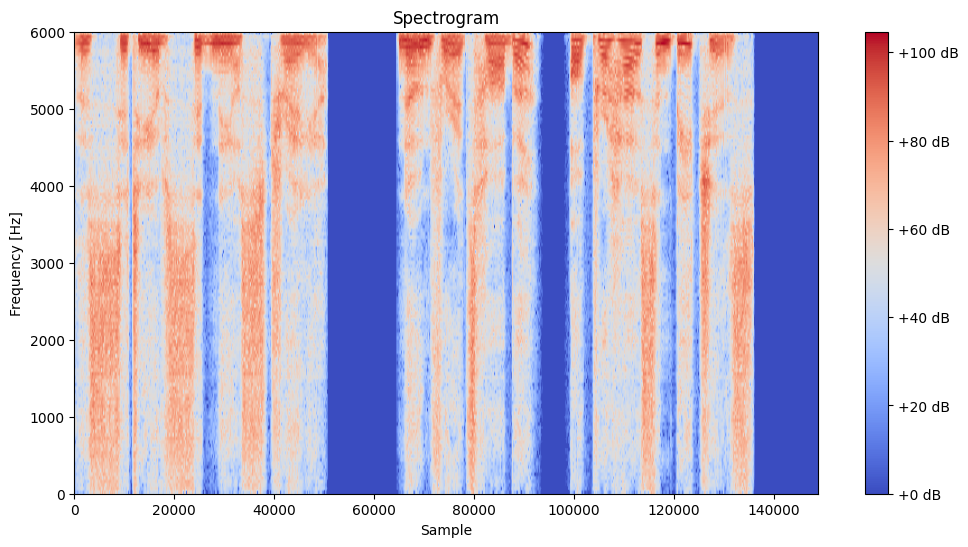

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_title("Spectrogram")
ax.set_xlabel('Sample')
ax.set_ylabel('Frequency [Hz]')
line, = ax.plot([], [], color='green', linewidth=1)
c = ax.imshow(Sxx_db, cmap="coolwarm", aspect="auto", extent=[0, times[-1], frequencies[0], frequencies[-1]], vmin=vmin, vmax=vmax)
plt.colorbar(c, format="%+2.0f dB")

In [18]:
duration = audio_data.shape[0] /  sample_rate
print(f"Duration of Audio: {duration}s")
num_frames = len(times)
print(f"Number of Frames: {num_frames}")
fps = num_frames / duration
print(f"Needed FPS: {fps}")

Duration of Audio: 6.209333333333333s
Number of Frames: 665
Needed FPS: 107.09684346145588


In [19]:
def init():
    line.set_data([], [])
    return line,

def update(frame):
    x = times[frame]  # Time corresponding to the current frame
    line.set_data([x, x], [frequencies[0], frequencies[-1]])
    return line,

In [20]:
import matplotlib.animation as animation

In [21]:
ani = animation.FuncAnimation(fig, update, init_func=init, frames=len(times), blit=True, interval=1000/fps)

In [22]:
ani.save("./spectrogram_animation.mp4", writer="ffmpeg", fps=fps)

#### Combining Audio And Video

In [23]:
from moviepy.editor import VideoFileClip, AudioFileClip

# Load the video and audio files
video = VideoFileClip('spectrogram_animation.mp4')
audio = AudioFileClip(file_path)

# Set the audio of the video clip
video = video.set_audio(audio)

# Save the final output with audio
video.write_videofile('spectrogram_animation_with_audio.mp4', codec='libx264', audio_codec='aac')


Moviepy - Building video spectrogram_animation_with_audio.mp4.
MoviePy - Writing audio in spectrogram_animation_with_audioTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video spectrogram_animation_with_audio.mp4



Moviepy - Done !
Moviepy - video ready spectrogram_animation_with_audio.mp4


##### Alternative

In [24]:
#!ffmpeg -i spectrogram_animation.mp4 -i amazon_rainforest.wav -c:v copy -c:a aac -strict experimental output_with_audio.mp4